In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
!python -m wget $data


Saved under AB_NYC_2019 (2).csv


In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<AxesSubplot:xlabel='price', ylabel='Count'>

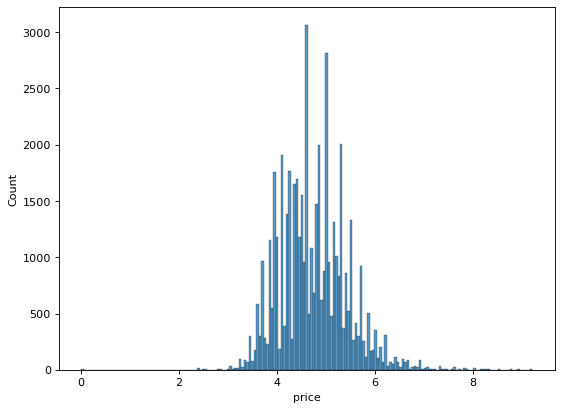

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(np.log1p(df.price))

In [7]:
useful_cols = [
        'latitude',
        'longitude',
        'price',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
]

# 1. Find a feature with missing values. How many missing values does it have?

In [8]:
df = df[useful_cols]

In [9]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# 2.What's the median (50% percentile) for variable 'minimum_nights'?

In [10]:
df['minimum_nights'].median()

3.0

# Split the data
## Shuffle the initial dataset, use seed 42.
## Split your data in train/val/test sets, with 60%/20%/20% distribution.
## sure that the target value ('price') is not in your dataframe.
## the log transformation to the price variable using the np.log1p() function.

In [11]:
df = df.sample(frac=1, random_state=42)
df['price'] = df.price.apply(np.log1p)

In [12]:
n = len(df)
n_train = int(0.6 * n)
n_test = int(0.2 * n)
n_val = n - n_train - n_test
print(n_train, n_test)

29337 9779


In [13]:
df.loc[:n_train]

latitude  longitude     price  minimum_nights  number_of_reviews  \
879    40.64354  -73.97777  4.499810               3                 62   
44383  40.70666  -73.90779  3.433987              21                  0   
15394  40.76116  -73.99016  4.795791               2                 17   
43230  40.70763  -74.01050  6.154858               2                  5   
16332  40.79658  -73.93287  5.298317               2                 30   
...         ...        ...       ...             ...                ...   
32288  40.79935  -73.95208  3.806662               1                 25   
34857  40.72159  -73.98959  5.288267               5                  1   
373    40.74503  -73.98876  5.135798              18                 54   
23330  40.67920  -73.93071  5.703782               2                 59   
29337  40.68994  -73.93031  4.110874              20                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
879                 0.71                               1               189  
44383                NaN                               1                73  
15394               0.43                               1                 0  
43230               1.88                             327               272  
16332               0.80                               1                30  
...                  ...                             ...               ...  
32288               1.83                               2                 6  
34857               0.14                               1                12  
373                 0.57                               1                98  
23330               2.31                               1               180  
29337                NaN                               1                 0  

[15868 rows x 8 columns]

In [14]:
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:n_test+n_train]
df_val = df.iloc[n_test+n_train:]

In [15]:
y_train = df_train.pop("price")
y_val = df_val.pop("price")
y_test = df_test.pop("price")

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?


In [16]:
from sklearn.impute import SimpleImputer

In [17]:
def rmse(y, y_pred):
    se =  (y- y_pred)**2
    mse = se.mean()
    return round(np.sqrt(mse),5)

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [19]:
def prepare_X(df, mean=True):
    if mean:
        df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
    else:
        df = df.fillna(0)
    X = df
    return X

In [20]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [21]:
X_train = prepare_X(df_train, mean=True)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.65363

In [22]:
X_train = prepare_X(df_train, mean=False)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.65397

# Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [23]:
def train_linear_regression_reg(X, y, r=1e-05):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])    
    
    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [24]:
r_params = [0, 0.1, 0.2, 0.01, 0.02,0.05, 0.001,0.002,0.0001,0.0002, 0.0004, 0.00001, 2, 3, 5, 7, 10]

In [25]:
X_train = prepare_X(df_train, mean=False)

for r in r_params:
    w0,w = train_linear_regression_reg(X_train, y_train)
    vX_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score,4))

0 0.654
0.1 0.654
0.2 0.654
0.01 0.654
0.02 0.654
0.05 0.654
0.001 0.654
0.002 0.654
0.0001 0.654
0.0002 0.654
0.0004 0.654
1e-05 0.654
2 0.654
3 0.654
5 0.654
7 0.654
10 0.654


# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [26]:

seeds = [0,1,2,3,4,5,6,7,8,9]
scores = {}
for seed in seeds:
    df = pd.read_csv('AB_NYC_2019.csv')
    df = df[useful_cols]
    df = df.sample(frac=1, random_state=seed)
    df['price'] = df.price.apply(np.log1p)


    df_train = df.iloc[:n_train]
    df_test = df.iloc[n_train:n_test+n_train]
    df_val = df.iloc[n_test+n_train:]

    y_train = df_train.pop("price")
    y_val = df_val.pop("price")
    y_test = df_test.pop("price")
    
    
    
    X_train = prepare_X(df_train, mean=False)
    w0,w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[seed] = score

In [27]:
round(np.std((list(scores.values()))),3)

0.007

In [28]:
scores.values()

dict_values([0.63062, 0.64874, 0.64118, 0.63986, 0.65579, 0.6393, 0.64753, 0.65612, 0.64078, 0.64534])

# Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [29]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df[useful_cols]
df = df.sample(frac=1, random_state=9)
df['price'] = df.price.apply(np.log1p)

In [30]:
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:n_test+n_train]
df_val = df.iloc[n_test+n_train:]

y_train = df_train.pop("price")
y_val = df_val.pop("price")
y_test = df_test.pop("price")

In [31]:
df_full = pd.concat([df_train, df_val], ignore_index=True, sort=False)

In [32]:
y_full =  pd.concat([y_train, y_val], ignore_index=True, sort=False)

In [33]:
X_full = prepare_X(df_full, mean=True)
w0,w = train_linear_regression_reg(X_full, y_full, 0.001)
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.64359

In [34]:
0.64409


0.64409